<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice.png' width=300/></center>

# CP3. [실습] 데이터 전처리와 시각화: 빌보드

- 본 실습은 간단한 데이터 시각화 방법을 직접 체험하기 위한 것입니다.
- 차트를 화려하게 꾸미는데 목적을 두지 말고 전처리 부분에 중점을 두는 것이 좋습니다.
- 우선 다음과 같은 과정으로 데이터 시각화를 수행함으로 알고 진행하기 바랍니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/visualization.png' width="650" align="left">

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline   
%config InlineBackend.figure_format = 'retina'

## 1. 데이터 불러오기

- **read_csv()** 함수를 사용해 분석할 데이터를 csv 파일에서 불러옵니다.
- billboard 데이터 셋은 2000년 빌보드 차드 정보입니다.
- 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/billboard.csv'

In [14]:
# billboard
file_path = 'https://raw.githubusercontent.com/Jangrae/csv/master/billboard.csv'
billboard = pd.read_csv(file_path)

## 2. 데이터 확인

- 데이터를 알아야 데이터를 분석할 수 있습니다.
- 우선 분석할 데이터가 어떤 형태의 데이터인지 확인합니다.

**1) 상위/하위 데이터 확인**

- **head()**, **tail()** 메소드로 상/하위 데이터를 확인합니다.

In [15]:
# 상위 5개 행 확인
billboard.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# 하위 5개 행 확인
billboard.tail()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
312,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,2000-08-05,2000-08-05,98,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Smith, Will",Freakin' It,3:58,Rap,2000-02-12,2000-02-12,99,99.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,2000-09-02,99,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,"Eastsidaz, The",Got Beef,3:58,Rap,2000-07-01,2000-07-01,99,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
316,2000,Fragma,Toca's Miracle,3:22,R&B,2000-10-28,2000-10-28,99,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**2) 열 데이터 개수, NaN 값 여부 확인**

- **info()** 메소드로 각 열의 값 개수, **NaN**값 포함 여부를 확인합니다.
- NaN값이 포함되어 있으면 결측치에 대한 해결(제거 또는 변경)이 필요합니다.

In [17]:
# 열 정보, NaN 값 포함 여부 확인
billboard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             317 non-null    int64  
 1   artist.inverted  317 non-null    object 
 2   track            317 non-null    object 
 3   time             317 non-null    object 
 4   genre            317 non-null    object 
 5   date.entered     317 non-null    object 
 6   date.peaked      317 non-null    object 
 7   x1st.week        317 non-null    int64  
 8   x2nd.week        312 non-null    float64
 9   x3rd.week        307 non-null    float64
 10  x4th.week        300 non-null    float64
 11  x5th.week        292 non-null    float64
 12  x6th.week        280 non-null    float64
 13  x7th.week        269 non-null    float64
 14  x8th.week        260 non-null    float64
 15  x9th.week        253 non-null    float64
 16  x10th.week       244 non-null    float64
 17  x11th.week      

**3) 기초 통계 정보 확인**

- **describe()** 메소드를 사용해 기초 통계 정보를 확인합니다.

In [18]:
# 기초 통계 정보 확인
billboard.describe()

,year,x1st.week,x2nd.week,x3rd.week,x4th.week,x5th.week,x6th.week,x7th.week,x8th.week,x9th.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
count,317.0,317.000000,312.000000,307.000000,300.000000,292.000000,280.000000,269.000000,260.000000,253.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2000.0,79.958991,71.173077,65.045603,59.763333,56.339041,52.360714,49.219331,47.119231,46.343874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,14.686865,18.200443,20.752302,22.324619,23.780022,24.473273,25.654279,26.370782,27.136419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2000.0,15.000000,8.000000,6.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2000.0,74.000000,63.000000,53.000000,44.750000,38.750000,33.750000,30.000000,27.000000,26.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2000.0,81.000000,73.000000,66.000000,61.000000,57.000000,51.500000,47.000000,45.500000,42.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2000.0,91.000000,84.000000,79.000000,76.000000,73.250000,72.250000,67.000000,67.000000,67.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2000.0,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000,99.000000,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**4) 질문**

- billboard 데이터가 분석하기에 적절한 형태인가요?
- billboard 데이터에 대해 어떤 분석이 의미가 있을까요?
- 분석에 걸림돌이 될 만한 것은 무엇일까요?
- 분석을 위해 우선 어떤 처리를 해야 할까요?

## 3. 데이터 전처리

- NaN 값이 포함된 열이 있으면 제거하거나 다른 값으로 채워야 합니다.
- 중복된 데이터는 정확한 분석을 방해하므로 제거해야 합니다.
- 기타 데이터에 방해가 되는 요소를 전처리 과정에서 제거합니다.

**1) 재 구조화**

- **x1st.week** 형태의 열 이름에 주에 대한 정보가 포함되어 있습니다.
- 우선 **Melt()** 함수를 사용해 이 열을 행의 값으로 내려야 합니다.
- year, artist.inverted, track, time, genre, date.entered, date.peaked 열이 고정 열이 되어야 합니다.
- 몇 주인지 정보는 **week**, 순위는 **rank** 열로 만들어지도록 합니다. 

In [19]:
# 재 구조화
id_vars = ['year','artist.inverted','track','time','genre','date.entered','date.peaked']
billboard_long = pd.melt(frame=billboard,
                        id_vars=id_vars,
                        var_name='week',
                        value_name='rank')

# 확인
billboard_long.head()


,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,x1st.week,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,x1st.week,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,x1st.week,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,x1st.week,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,x1st.week,57.0


**2) 결측치 제거**

- info() 메소드로 확인해 보면 rank 열에 결측치가 많이 있습니다.
- NaN 값은 빌보드 TOP 100을 벗어났다는 의미입니다. 

In [20]:
# 열 정보 확인
billboard_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24092 entries, 0 to 24091
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             24092 non-null  int64  
 1   artist.inverted  24092 non-null  object 
 2   track            24092 non-null  object 
 3   time             24092 non-null  object 
 4   genre            24092 non-null  object 
 5   date.entered     24092 non-null  object 
 6   date.peaked      24092 non-null  object 
 7   week             24092 non-null  object 
 8   rank             5307 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.7+ MB


- rank 열이 NaN 값인 행은 순위권에 들지 못해 의미가 없으니 **dropna()** 메소드를 사용해 결측치를 제거합니다.

In [21]:
# 결측치 제거
billboard_long.dropna(inplace=True)

In [22]:
# 다시 확인
billboard_long.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5307 entries, 0 to 20334
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             5307 non-null   int64  
 1   artist.inverted  5307 non-null   object 
 2   track            5307 non-null   object 
 3   time             5307 non-null   object 
 4   genre            5307 non-null   object 
 5   date.entered     5307 non-null   object 
 6   date.peaked      5307 non-null   object 
 7   week             5307 non-null   object 
 8   rank             5307 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 414.6+ KB


**3) 문자열에서 정수 추출**

- 문자열에서 숫자를 뽑을 때는 정규식을 사용해야 합니다.
- 다음 코드가 간단한 예를 보여줍니다. 이 방법을 사용해 숫자를 추출합니다.

In [ ]:
# 문자열에서 정수 추출하기
a = pd.Series(['a1bc', 'abc13k', '119', '43a2'])
a.str.extract('(\d+)')

- **week**에서 숫자만 추출해서 다시 week 열에 저장합니다.
- 문자열 메소드를 데이터프레임 열에 사용할 때는 **str.메소드()** 형태가 되어야 합니다.

In [25]:
# 숫자 추출
billboard_long['week'] = billboard_long['week'].str.extract('(\d+)')

# 확인
billboard_long.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,1,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,1,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,1,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,1,57.0


**4) 데이터 형식 변경**
- **week**, **rank**는 **astype()** 메소드를 사용해 **정수형**으로 변경합니다.

In [27]:
# 숫자 추출, 정수 변환
billboard_long['week'] = billboard_long['week'].astype(int)
billboard_long['rank'] = billboard_long['rank'].astype(int)

# 확인
billboard_long.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5307 entries, 0 to 20334
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   year             5307 non-null   int64 
 1   artist.inverted  5307 non-null   object
 2   track            5307 non-null   object
 3   time             5307 non-null   object
 4   genre            5307 non-null   object
 5   date.entered     5307 non-null   object
 6   date.peaked      5307 non-null   object
 7   week             5307 non-null   int32 
 8   rank             5307 non-null   int32 
dtypes: int32(2), int64(1), object(6)
memory usage: 373.1+ KB


**5) 인덱스 초기화**

- 중간에 결측치가 제거되면서 인덱스에 구멍이 있을겁니다.
- 깔끔한 데이터를 위해 인덱스를 초기화 합니다.

In [28]:
# 인덱스 초기화
billboard_long.reset_index(drop=True, inplace=True)

In [29]:
# 확인
billboard_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5307 entries, 0 to 5306
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   year             5307 non-null   int64 
 1   artist.inverted  5307 non-null   object
 2   track            5307 non-null   object
 3   time             5307 non-null   object
 4   genre            5307 non-null   object
 5   date.entered     5307 non-null   object
 6   date.peaked      5307 non-null   object
 7   week             5307 non-null   int32 
 8   rank             5307 non-null   int32 
dtypes: int32(2), int64(1), object(6)
memory usage: 331.8+ KB


## 4. [옵션]데이터 시각화

- 이제 전처리가 진행된 데이터를 시각화해서 분석합니다.

**1) Maria, Maria 순위 변동**

- Maria, Maria 순위 변동을 라인 그래프로 표시해 봅니다.

<img src="https://upload.wikimedia.org/wikipedia/en/f/fd/Mariamaria_santana_singlecover.jpg" align="left"/>

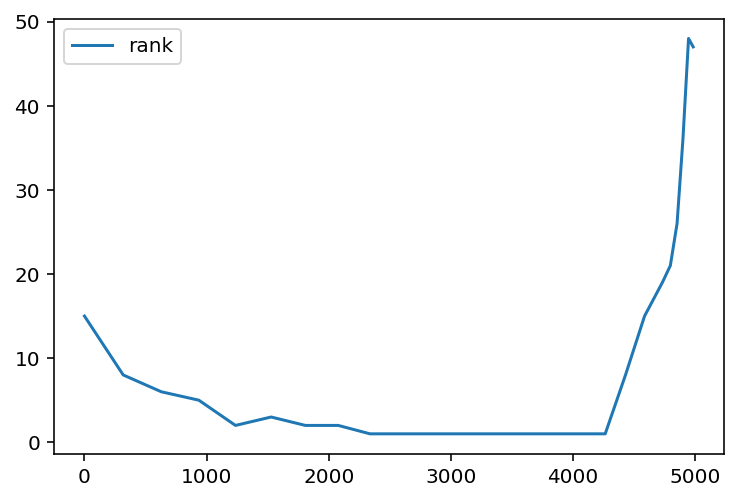

In [30]:
# Maria, Maria 차트 변동
billboard_long[billboard_long['track'] == 'Maria, Maria'].plot(kind='line', y='rank')
plt.show()

**2) Music 순위 변동**

- Music 순위 변동을 라인 그래프로 표시해 봅니다.

<img src = "https://upload.wikimedia.org/wikipedia/en/f/f3/Madonna%2C_Music_single_cover.png" align="left"/>

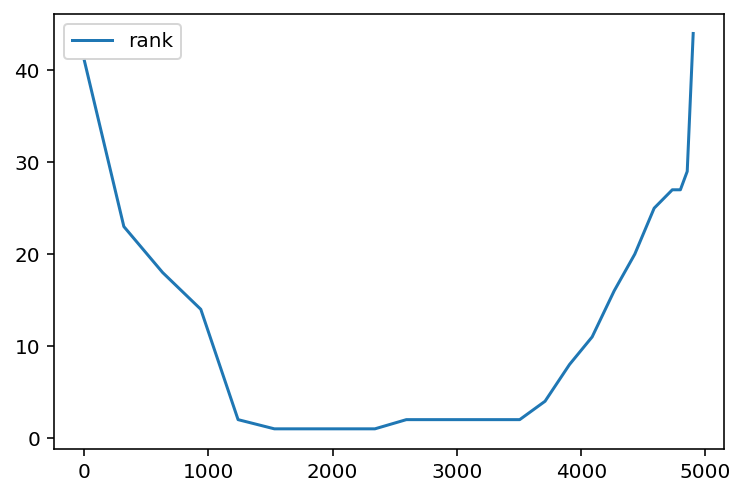

In [31]:
# Music 차트 변동
billboard_long[billboard_long['track'] == 'Music'].plot(kind='line', y='rank')
plt.show()

**[참고] y 축 뒤집기**

- 1등이 위로 올라가야 의미가 있어 보일듯 합니다.
- **plt.gca().invert_yaxis()** 처럼 하면 y 축이 뒤집어 표시됩니다.

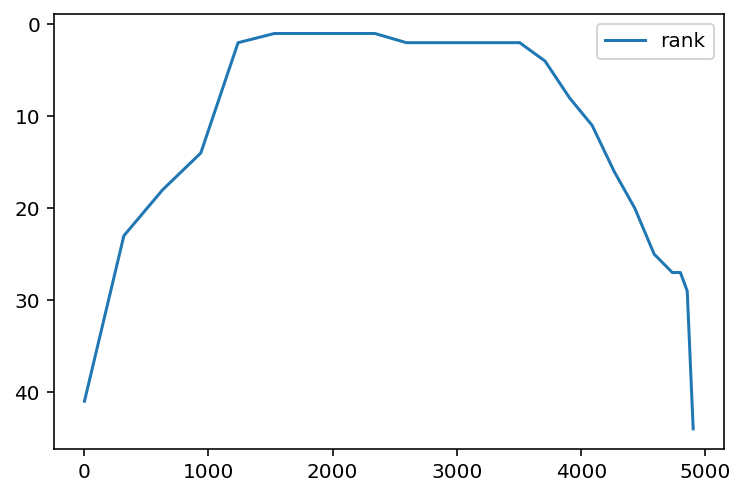

In [32]:
# Music 차트 변동
billboard_long[billboard_long['track'] == 'Music'].plot(kind='line', y='rank')
plt.gca().invert_yaxis()
plt.show()

## 5. 의미 찾기

- 데이터 분석을 제대로 하려면 제대로된 데이터가 있어야 합니다.
- 다양한 전처리 방법을 사용해 분석이 용이한 형태로 데이터를 변경해야 합니다.
- melt() 함수 사용 방법을 꼭 기억하시기 바랍니다.

## <center>수고하셨습니다.</center>
<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/end.png' width=200/></center>